Computing the hot water array for input into Ocetrac.
1. Compute anomaly as difference between daily observed values and climatology.
1. Open threshold
2. Compute hot water by dropping all values in the anomaly array where the value is below the threshold

In [46]:
from datetime import datetime

import numpy as np
import xarray as xr
import zarr
import dask
import dask.array as da
from dask.distributed import Client
import marineHeatWaves as mhw

client = Client()

In [48]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 128,Total memory: 503.40 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37291,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 128
Started: 5 minutes ago,Total memory: 503.40 GiB
Comm: tcp://127.0.0.1:39056,Total threads: 8
Dashboard: http://127.0.0.1:33859/status,Memory: 31.46 GiB
Nanny: tcp://127.0.0.1:43911,


Open geopolar

# Anomaly

In [2]:
print('access data ------')

filepath = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/noaa-coastwatch-geopolar-sst-feedstock/noaa-coastwatch-geopolar-sst.zarr'
geopolar = xr.open_zarr(filepath)
geopolar = geopolar.analysed_sst

min_lat, max_lat, min_lon, max_lon = (32, 53, -79, -42)
geopolar = geopolar.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))

access data ------


Open climatology

In [3]:
climatology = xr.open_dataset('/data/pacific/rwegener/gulfstream_climatology.nc')
climatology = climatology.climatology

In [7]:
clim_subset = climatology.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))

In [8]:
geopolar_subset = geopolar

In [9]:
# slice of 100 took 12 sec -> Full time series ~15 minutes
anomaly_subset = geopolar_subset.isel(time=slice(0, 1000)) - clim_subset.isel(time=slice(0, 1000))

In [10]:
anomaly_subset

<xarray.DataArray (time: 1000, lat: 420, lon: 740)>
dask.array<sub, shape=(1000, 420, 740), dtype=float32, chunksize=(2, 420, 740), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 32.03 32.08 32.12 32.17 ... 52.83 52.88 52.92 52.97
  * lon      (lon) float32 -78.97 -78.93 -78.88 -78.82 ... -42.12 -42.08 -42.03
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2005-05-27T12:00:00

In [4]:
anomaly = geopolar - climatology

In [5]:
anomaly

<xarray.DataArray (time: 7134, lat: 420, lon: 740)>
dask.array<sub, shape=(7134, 420, 740), dtype=float32, chunksize=(2, 420, 740), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 32.03 32.08 32.12 32.17 ... 52.83 52.88 52.92 52.97
  * lon      (lon) float32 -78.97 -78.93 -78.88 -78.82 ... -42.12 -42.08 -42.03
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2022-03-20T12:00:00

In [11]:
%%time

anomaly.load()

CPU times: user 2min 39s, sys: 28.3 s, total: 3min 7s
Wall time: 13min 17s


<xarray.DataArray (time: 7134, lat: 420, lon: 740)>
array([[[-4.31091309e-01, -4.45922852e-01, -4.74304199e-01, ...,
         -4.54772949e-01, -4.49859619e-01, -4.45404053e-01],
        [-3.81958008e-01, -4.07440186e-01, -4.37133789e-01, ...,
         -4.49279785e-01, -4.54650879e-01, -4.50225830e-01],
        [-3.34503174e-01, -3.68560791e-01, -4.08386230e-01, ...,
         -4.33959961e-01, -4.49462891e-01, -4.34906006e-01],
        ...,
        [-2.08477783e+00, -2.26821899e+00, -2.43673706e+00, ...,
         -2.73651123e-01, -2.88421631e-01, -3.12805176e-01],
        [-2.03991699e+00, -2.18841553e+00, -2.34906006e+00, ...,
         -2.76031494e-01, -2.91198730e-01, -3.16284180e-01],
        [-1.98779297e+00,             nan,             nan, ...,
         -2.98583984e-01, -3.14331055e-01, -3.30108643e-01]],

       [[-6.06506348e-01, -6.31103516e-01, -6.49261475e-01, ...,
         -2.41821289e-01, -2.57019043e-01, -2.42614746e-01],
        [-5.67901611e-01, -5.93109131e-01, -6.22497559e-01, ...,
         -2.76245117e-01, -3.11706543e-01, -3.27362061e-01],
        [-5.10986328e-01, -5.54840088e-01, -5.84381104e-01, ...,
         -2.50915527e-01, -2.96478271e-01, -3.11950684e-01],
...
         -4.20196533e-01, -4.87457275e-01, -5.56030273e-01],
        [ 6.57073975e-01,  6.46423340e-01,  6.15295410e-01, ...,
         -3.43566895e-01, -4.10858154e-01, -4.78912354e-01],
        [ 7.28210449e-01,             nan,             nan, ...,
         -2.70599365e-01, -3.38287354e-01, -3.96484375e-01]],

       [[ 6.79473877e-01,  7.50885010e-01,  8.22082520e-01, ...,
         -4.67163086e-01, -4.59503174e-01, -4.40551758e-01],
        [ 4.53399658e-01,  5.13336182e-01,  5.70800781e-01, ...,
         -4.42932129e-01, -4.46014404e-01, -4.27429199e-01],
        [ 3.30505371e-01,  3.74084473e-01,  4.24041748e-01, ...,
         -4.47540283e-01, -4.41497803e-01, -4.23492432e-01],
        ...,
        [ 4.90936279e-01,  4.60205078e-01,  4.09423828e-01, ...,
         -3.43566895e-01, -4.00726318e-01, -4.49279785e-01],
        [ 5.52124023e-01,  5.31433105e-01,  4.80316162e-01, ...,
         -2.57080078e-01, -3.14270020e-01, -3.72222900e-01],
        [ 6.33300781e-01,             nan,             nan, ...,
         -1.74346924e-01, -2.31872559e-01, -2.90008545e-01]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 32.03 32.08 32.12 32.17 ... 52.83 52.88 52.92 52.97
  * lon      (lon) float32 -78.97 -78.93 -78.88 -78.82 ... -42.12 -42.08 -42.03
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2022-03-20T12:00:00

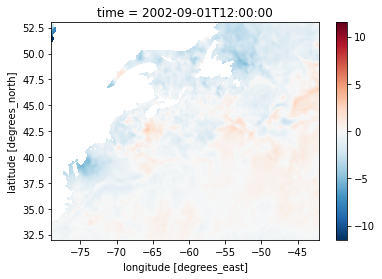

In [13]:
anomaly.isel(time=0).plot()

In [14]:
anomaly.attrs['description'] = 'sst daily values minus the full dataset climatology'
anomaly.attrs['source_datasets'] = ['Geopolar SST', 'gulfstream_climatology.nc']
anomaly.attrs['date created'] = datetime.today().strftime('%Y-%m-%d')

In [15]:
anomaly

<xarray.DataArray (time: 7134, lat: 420, lon: 740)>
array([[[-4.31091309e-01, -4.45922852e-01, -4.74304199e-01, ...,
         -4.54772949e-01, -4.49859619e-01, -4.45404053e-01],
        [-3.81958008e-01, -4.07440186e-01, -4.37133789e-01, ...,
         -4.49279785e-01, -4.54650879e-01, -4.50225830e-01],
        [-3.34503174e-01, -3.68560791e-01, -4.08386230e-01, ...,
         -4.33959961e-01, -4.49462891e-01, -4.34906006e-01],
        ...,
        [-2.08477783e+00, -2.26821899e+00, -2.43673706e+00, ...,
         -2.73651123e-01, -2.88421631e-01, -3.12805176e-01],
        [-2.03991699e+00, -2.18841553e+00, -2.34906006e+00, ...,
         -2.76031494e-01, -2.91198730e-01, -3.16284180e-01],
        [-1.98779297e+00,             nan,             nan, ...,
         -2.98583984e-01, -3.14331055e-01, -3.30108643e-01]],

       [[-6.06506348e-01, -6.31103516e-01, -6.49261475e-01, ...,
         -2.41821289e-01, -2.57019043e-01, -2.42614746e-01],
        [-5.67901611e-01, -5.93109131e-01, -6.22497559e-01, ...,
         -2.76245117e-01, -3.11706543e-01, -3.27362061e-01],
        [-5.10986328e-01, -5.54840088e-01, -5.84381104e-01, ...,
         -2.50915527e-01, -2.96478271e-01, -3.11950684e-01],
...
         -4.20196533e-01, -4.87457275e-01, -5.56030273e-01],
        [ 6.57073975e-01,  6.46423340e-01,  6.15295410e-01, ...,
         -3.43566895e-01, -4.10858154e-01, -4.78912354e-01],
        [ 7.28210449e-01,             nan,             nan, ...,
         -2.70599365e-01, -3.38287354e-01, -3.96484375e-01]],

       [[ 6.79473877e-01,  7.50885010e-01,  8.22082520e-01, ...,
         -4.67163086e-01, -4.59503174e-01, -4.40551758e-01],
        [ 4.53399658e-01,  5.13336182e-01,  5.70800781e-01, ...,
         -4.42932129e-01, -4.46014404e-01, -4.27429199e-01],
        [ 3.30505371e-01,  3.74084473e-01,  4.24041748e-01, ...,
         -4.47540283e-01, -4.41497803e-01, -4.23492432e-01],
        ...,
        [ 4.90936279e-01,  4.60205078e-01,  4.09423828e-01, ...,
         -3.43566895e-01, -4.00726318e-01, -4.49279785e-01],
        [ 5.52124023e-01,  5.31433105e-01,  4.80316162e-01, ...,
         -2.57080078e-01, -3.14270020e-01, -3.72222900e-01],
        [ 6.33300781e-01,             nan,             nan, ...,
         -1.74346924e-01, -2.31872559e-01, -2.90008545e-01]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 32.03 32.08 32.12 32.17 ... 52.83 52.88 52.92 52.97
  * lon      (lon) float32 -78.97 -78.93 -78.88 -78.82 ... -42.12 -42.08 -42.03
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2022-03-20T12:00:00
Attributes:
    description:      sst daily values minus the full dataset climatology
    source_datasets:  ['Geopolar SST', 'gulfstream_climatology.nc']
    date created:     2022-05-23

In [16]:
# Took < 2 minutes
anomaly.to_dataset(name='anomaly').to_netcdf('/data/pacific/rwegener/gulfstream_anomaly.nc')

In [69]:
client.close()

# Hot Water

In [2]:
import xarray as xr
import numpy as np

In [52]:
print('access data ------')

filepath = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/noaa-coastwatch-geopolar-sst-feedstock/noaa-coastwatch-geopolar-sst.zarr'
geopolar = xr.open_zarr(filepath)
geopolar = geopolar.analysed_sst

min_lat, max_lat, min_lon, max_lon = (32, 53, -79, -42)
t = 100
geopolar = geopolar.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))

access data ------


In [39]:
threshold = xr.open_dataset('/data/pacific/rwegener/gulfstream_threshold.nc')
anomaly = xr.open_dataset('/data/pacific/rwegener/gulfstream_anomaly.nc')
threshold = threshold.threshold
anomaly = anomaly.anomaly

In [53]:
thresh_subset = threshold.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))
anom_subset = anomaly.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))


In [54]:
geopolar

<xarray.DataArray 'analysed_sst' (time: 7134, lat: 420, lon: 740)>
dask.array<getitem, shape=(7134, 420, 740), dtype=float32, chunksize=(2, 420, 740), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 32.03 32.08 32.12 32.17 ... 52.83 52.88 52.92 52.97
  * lon      (lon) float32 -78.97 -78.93 -78.88 -78.82 ... -42.12 -42.08 -42.03
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2022-03-20T12:00:00
Attributes:
    comment:        Analysed SST for each ocean grid point
    long_name:      analysed sea surface temperature
    reference:      Fieguth,P.W. et al. "Mapping Mediterranean altimeter data...
    source:         STAR-ACSPO_GAC, STAR-ACSPO_H-8, STAR-Geo_SST, UKMO-OSTIA
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      4000
    valid_min:      -200

In [57]:
hot_water = anom_subset.where(geopolar>thresh_subset)

In [58]:
hot_water

<xarray.DataArray 'anomaly' (time: 7134, lat: 420, lon: 740)>
dask.array<where, shape=(7134, 420, 740), dtype=float32, chunksize=(2, 420, 740), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 32.03 32.08 32.12 32.17 ... 52.83 52.88 52.92 52.97
  * lon      (lon) float32 -78.97 -78.93 -78.88 -78.82 ... -42.12 -42.08 -42.03
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2022-03-20T12:00:00
Attributes:
    description:      sst daily values minus the full dataset climatology
    source_datasets:  ['Geopolar SST', 'gulfstream_climatology.nc']
    date created:     2022-05-23

### Notes from hot water calculation
- running where all inputs except Geopolar are netcdf
- bytes stored hung out at ~280GB
- task distribtion odd - 1 worker with 3000 tasks and the others with 300
- 6x nanny had to restart a worker bc worker exceded 95% memory budget a the beginning, then lots more (~2 dozen?) later on
- final view: LOTS of red communication bars

Typical Dask screen:
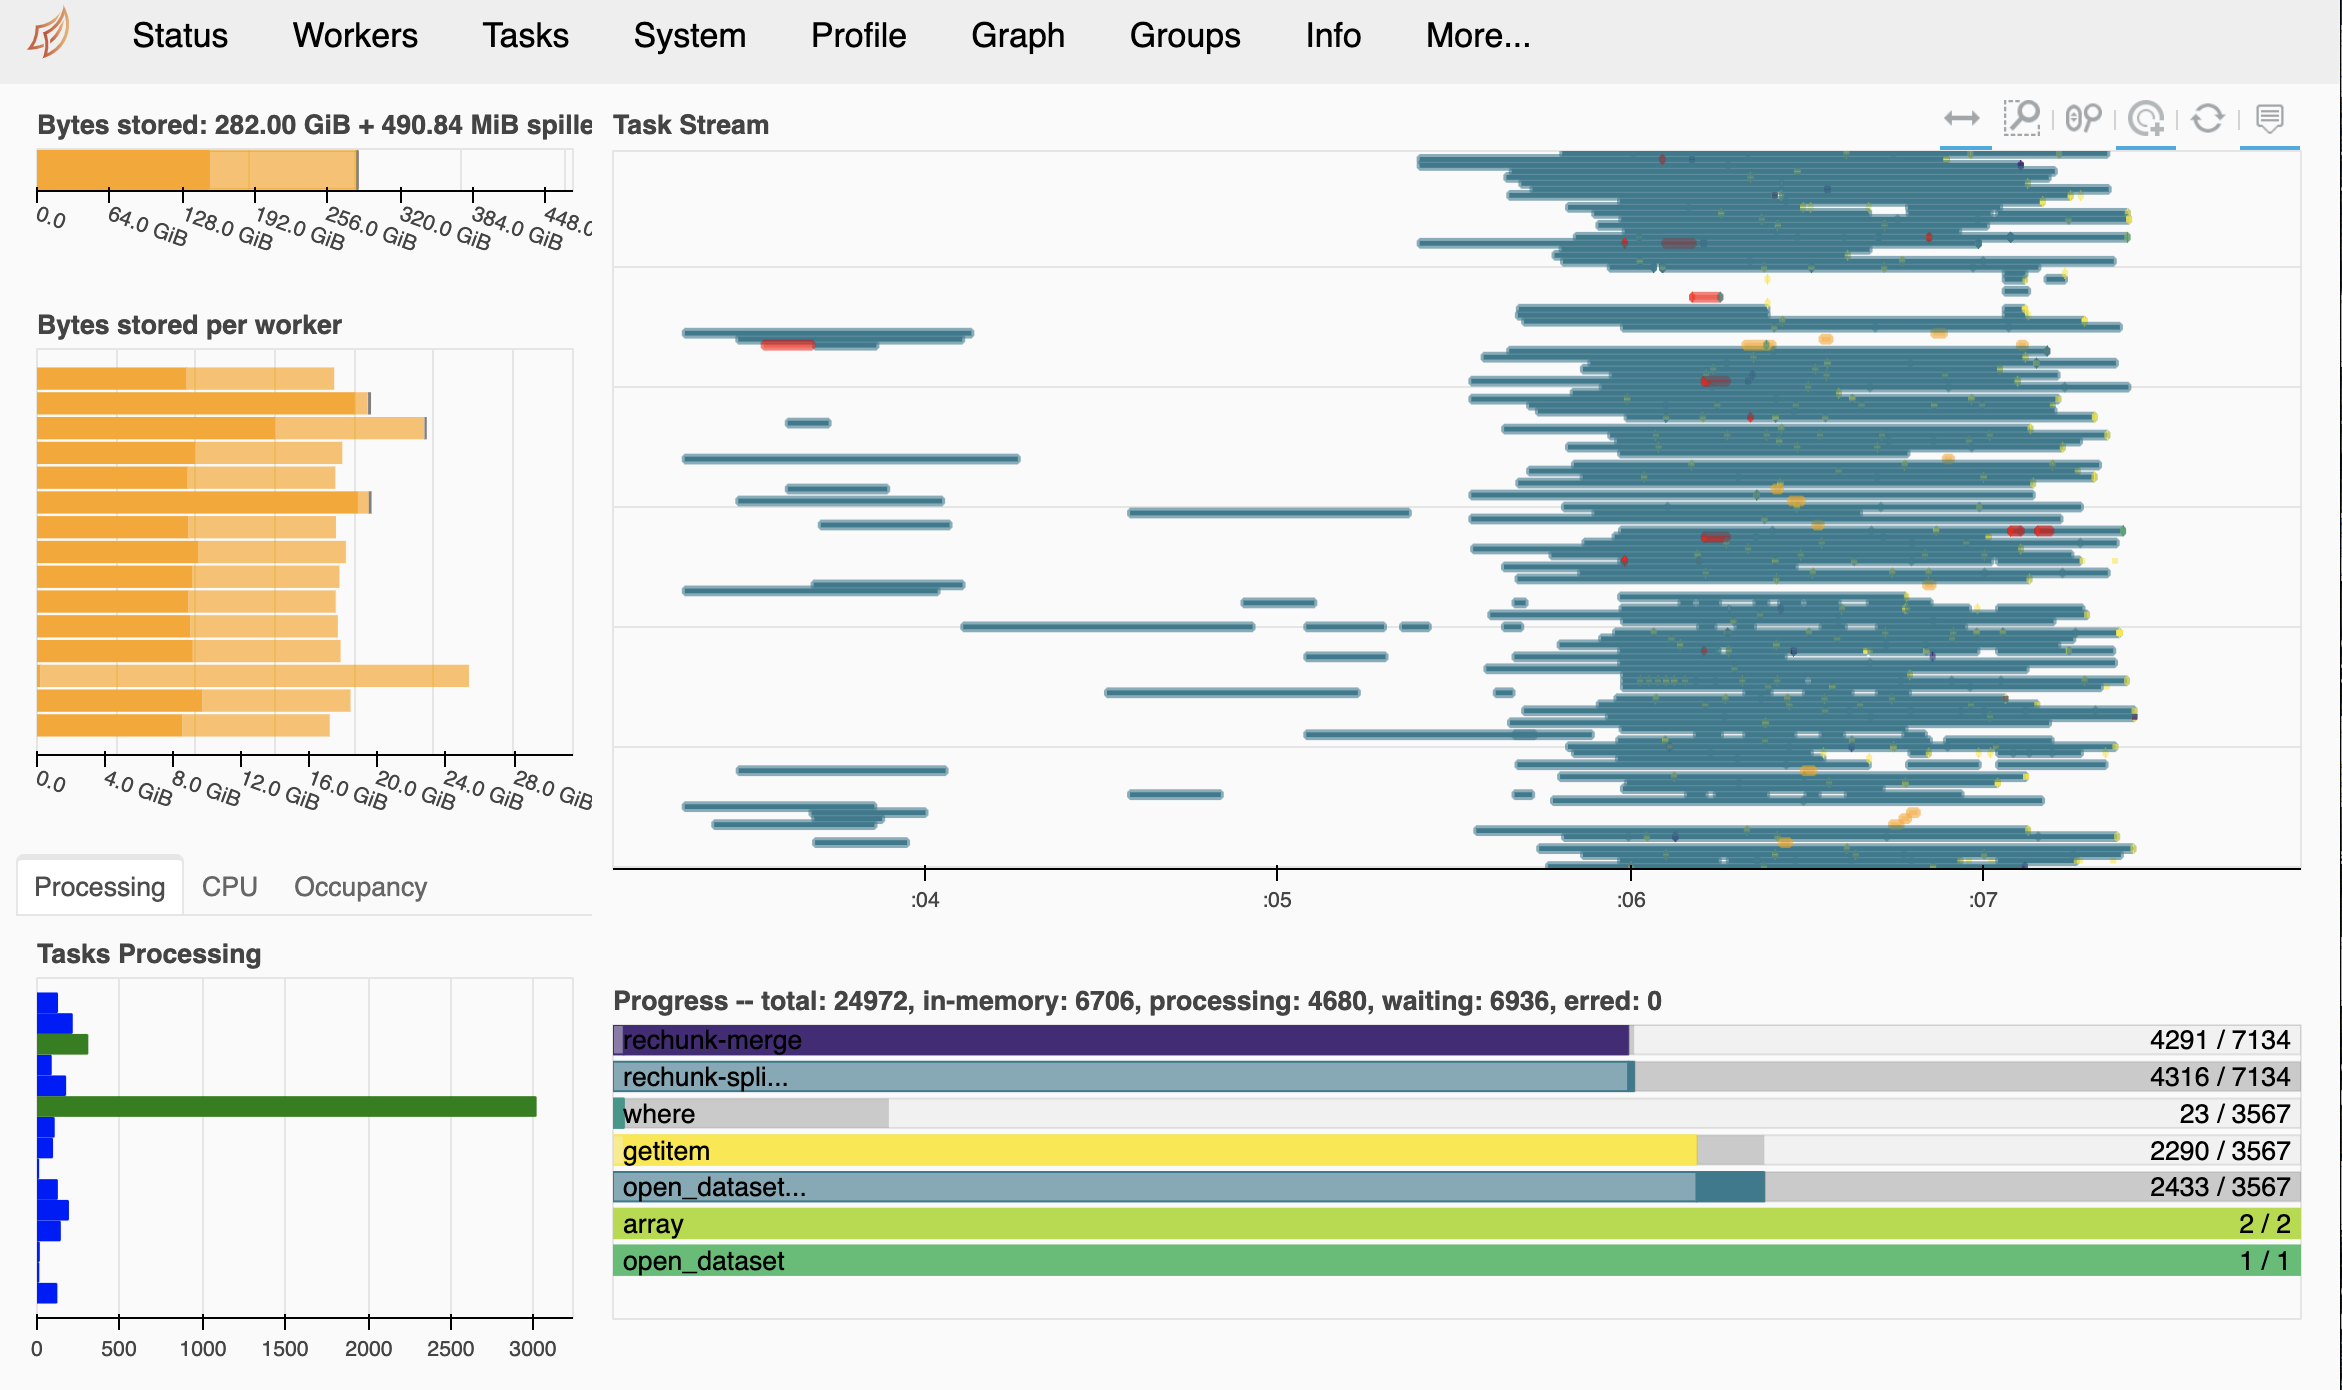

In [59]:
hot_water.load()

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distribu

<xarray.DataArray 'anomaly' (time: 7134, lat: 420, lon: 740)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.605896  , 0.59521484, 0.5544739 , ...,        nan,
                nan,        nan],
        [0.657074  , 0.64642334, 0.6152954 , ...,        nan,
                nan,        nan],
        [0.72821045,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.49093628, 0.46020508, 0.40942383, ...,        nan,
                nan,        nan],
        [0.552124  , 0.5314331 , 0.48031616, ...,        nan,
                nan,        nan],
        [0.6333008 ,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 32.03 32.08 32.12 32.17 ... 52.83 52.88 52.92 52.97
  * lon      (lon) float32 -78.97 -78.93 -78.88 -78.82 ... -42.12 -42.08 -42.03
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2022-03-20T12:00:00
Attributes:
    description:      sst daily values minus the full dataset climatology
    source_datasets:  ['Geopolar SST', 'gulfstream_climatology.nc']
    date created:     2022-05-23

In [66]:
hot_water.attrs.pop('source_datasets')

['Geopolar SST', 'gulfstream_climatology.nc']

In [64]:
hot_water.attrs['description'] = 'nan values in all pixels that were not experiencing' \
    ' a marine heatwave. The value of the anomaly is given in pixels that where ' \
    ' experiencing a marine heatwave.'
hot_water.attrs['source_datasets'] = ['Geopolar SST', 'anomaly', 'threshold']

In [68]:
hot_water.to_dataset(name='hot_water').to_netcdf('/data/pacific/rwegener/gulfstream_hotwater.nc')
